In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('D://Customer_churn.csv')

Look at the top 5 records of data

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges(Dollar),Total Charges(Dollar),Churn Label,Churn Reason,Date
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer,31-Jan-22
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved,28-Feb-22
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved,31-Mar-22
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved,30-Apr-22
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices,31-May-22


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
df.shape

(7043, 31)

In [5]:
df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges(Dollar)',
       'Total Charges(Dollar)', 'Churn Label', 'Churn Reason', 'Date '],
      dtype=object)

In [6]:
#Checking the data types of all the columns
df.dtypes

CustomerID                  object
Count                        int64
Country                     object
State                       object
City                        object
Zip Code                     int64
Lat Long                    object
Latitude                   float64
Longitude                  float64
Gender                      object
Senior Citizen              object
Partner                     object
Dependents                  object
Tenure Months                int64
Phone Service               object
Multiple Lines              object
Internet Service            object
Online Security             object
Online Backup               object
Device Protection           object
Tech Support                object
Streaming TV                object
Streaming Movies            object
Contract                    object
Paperless Billing           object
Payment Method              object
Monthly Charges(Dollar)    float64
Total Charges(Dollar)       object
Churn Label         

#As we can see the total charges is object type we have to convert it to float type to get its statistical datas

In [7]:
#First we will replace the null values to 0 as without that is can not be changed to float type
df['Total Charges(Dollar)']=df['Total Charges(Dollar)'].replace(to_replace=' ',value=0)

In [8]:
df['Total Charges(Dollar)']=df['Total Charges(Dollar)'].astype(float)

Now checking the types

In [9]:
df.dtypes

CustomerID                  object
Count                        int64
Country                     object
State                       object
City                        object
Zip Code                     int64
Lat Long                    object
Latitude                   float64
Longitude                  float64
Gender                      object
Senior Citizen              object
Partner                     object
Dependents                  object
Tenure Months                int64
Phone Service               object
Multiple Lines              object
Internet Service            object
Online Security             object
Online Backup               object
Device Protection           object
Tech Support                object
Streaming TV                object
Streaming Movies            object
Contract                    object
Paperless Billing           object
Payment Method              object
Monthly Charges(Dollar)    float64
Total Charges(Dollar)      float64
Churn Label         

In [ ]:
As we can see it has been changed to float type, now we can do further Exploratory data analysis for the data

In [10]:
#Check the descriptive statistics of numeric variables
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges(Dollar),Total Charges(Dollar)
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,2.839761e+06,2.841975e+06
std,0.0,1865.794555,2.455723,2.157889,24.559481,2.383149e+08,2.383148e+08
min,1.0,90001.000000,32.555828,-124.301372,0.000000,-2.000000e+04,-2.000000e+04
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,3.550000e+01,3.985500e+02
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,7.035000e+01,1.394550e+03
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,8.985000e+01,3.790400e+03
max,1.0,96161.000000,41.962127,-114.192901,72.000000,2.000000e+10,2.000000e+10


There is some problem with dataset, for monthly charges and total charges as it cannot be this much big value, we have to find and replace with suitable values.

In [11]:
#We have replaced the negative value -20000 with 0.
df['Monthly Charges(Dollar)']=df['Monthly Charges(Dollar)'].replace(to_replace=-20000,value=0)

In [12]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges(Dollar),Total Charges(Dollar)
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,2.839764e+06,2.841975e+06
std,0.0,1865.794555,2.455723,2.157889,24.559481,2.383149e+08,2.383148e+08
min,1.0,90001.000000,32.555828,-124.301372,0.000000,0.000000e+00,-2.000000e+04
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,3.550000e+01,3.985500e+02
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,7.035000e+01,1.394550e+03
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,8.985000e+01,3.790400e+03
max,1.0,96161.000000,41.962127,-114.192901,72.000000,2.000000e+10,2.000000e+10


In [13]:
df.max()

C:\Users\112987\AppData\Local\Temp\ipykernel_19568\1151452817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


Count                                             1
Country                    United States of America
State                                    California
City                                          Zenia
Zip Code                                      96161
Lat Long                     41.962127, -122.527696
Latitude                                  41.962127
Longitude                               -114.192901
Gender                                        Other
Senior Citizen                                  Yes
Partner                                         Yes
Dependents                                      Yes
Tenure Months                                    72
Phone Service                                   Yes
Multiple Lines                                  Yes
Internet Service                                 No
Online Security                                 Yes
Online Backup                                   Yes
Device Protection                               Yes
Tech Support

As we can see Maximum value in monthly and total charges is 20000000000 which is an error so we will first replace it by 0

In [14]:
df['Monthly Charges(Dollar)']=df['Monthly Charges(Dollar)'].replace(to_replace=20000000000,value=0)

In [15]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges(Dollar),Total Charges(Dollar)
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.748495,2.841975e+06
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.104693,2.383148e+08
min,1.0,90001.000000,32.555828,-124.301372,0.000000,0.000000,-2.000000e+04
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,3.985500e+02
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1.394550e+03
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3.790400e+03
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,2.000000e+10


As we can see for Monthly Charges after replacing those 2 values mean is 64.74, so we can take mean in place of both the values to fill the zero values

In [16]:
df['Monthly Charges(Dollar)']=df['Monthly Charges(Dollar)'].replace(to_replace=0,value=64.74)

In [17]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges(Dollar),Total Charges(Dollar)
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.766879,2.841975e+06
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.084906,2.383148e+08
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,-2.000000e+04
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.525000,3.985500e+02
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1.394550e+03
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3.790400e+03
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,2.000000e+10


Same problem is in Total Charges also so we will follow the same steps as done for montlhy charges

In [18]:
df['Total Charges(Dollar)']=df['Total Charges(Dollar)'].replace(to_replace=-20000,value=0)
df['Total Charges(Dollar)']=df['Total Charges(Dollar)'].replace(to_replace=20000000000,value=0)

In [19]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges(Dollar),Total Charges(Dollar)
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.766879,2279.342709
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.084906,2266.986989
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.525000,397.775000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1393.600000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000


As we can see mean is 2279.34 for Total Charges so we will replace the 0 values with the mean

In [20]:
df['Total Charges(Dollar)']=df['Total Charges(Dollar)'].replace(to_replace=0,value=2279.34)

In [21]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges(Dollar),Total Charges(Dollar)
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.766879,2283.549925
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.084906,2264.866717
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.525000,402.550000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1400.850000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000


In [27]:
print(df['Gender'].unique())

['Male' 'Female' 'Other'
 'Fe maleeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee']


As we can see there is an unusual name in gender column so we can replace it by "Female"

In [28]:
df['Gender']=df['Gender'].replace(to_replace='Fe maleeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee',value='Female')

In [29]:
print(df['Gender'].unique())

['Male' 'Female' 'Other']


So the unusual name is replaced

In [30]:
print(df['State'].unique())

['California' 'Cali  fornia']


As 'California' and 'Cali  fornia' is same se we can replace 'Cali  fornia' with 'California'

In [31]:
df['State']=df['State'].replace(to_replace='Cali  fornia',value='California')

In [32]:
print(df['State'].unique())

['California']


So the unusual name is replaced

In [33]:
print(df['Country'].unique())

['United States' 'USA' 'United States of America' 'JAPAN TESTING']


As in data all citis are of USA, so United States, Unites States of America and JAPAN TESTING can be replaced by USA

In [34]:
df['Country']=df['Country'].replace(to_replace=['United States','United States of America','JAPAN TESTING'],value='USA')

In [35]:
print(df['Country'].unique())

['USA']


All unwanted Country name replaced by a proper name 'USA' to mak it easy for Analysis

In [22]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

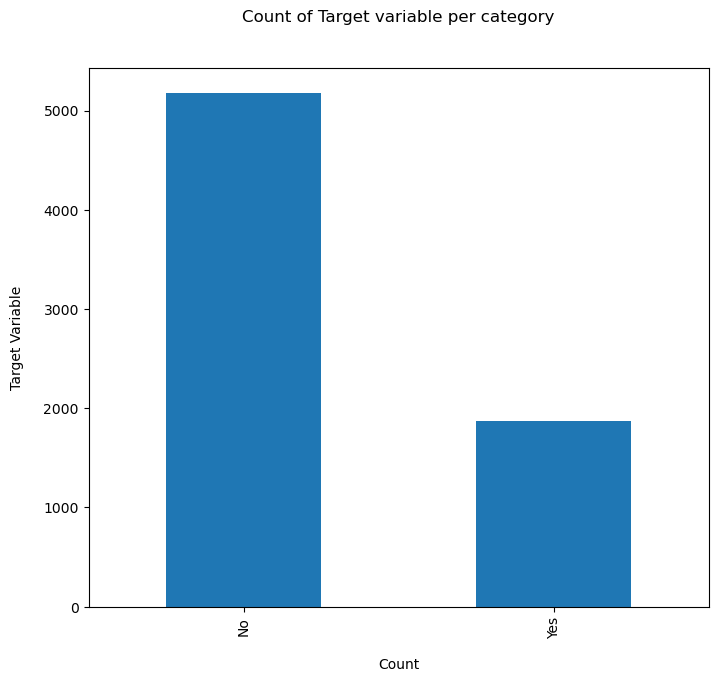

In [23]:
df['Churn Label'].value_counts().plot(kind='bar', figsize=(8, 7))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target variable per category", y=1.07);

In [24]:
print(df['Tenure Months'].max())

72


Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [25]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df['Tenure Months'], range(1, 80, 12), right=False, labels=labels)

In [26]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Remove columns not required for processing

# drop columns CustomerID, Count, Country,State,Zip Code, Lat Long, Latitude, Longitude, Tenure Months, City

In [ ]:
df.drop(columns= ['CustomerID', 'Count', 'Country','State','Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Tenure Months'], axis=1, inplace=True)

In [41]:
df.head()

,City,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges(Dollar),Total Charges(Dollar),Churn Label,Churn Reason,Date,tenure_group
0,Los Angeles,Male,No,No,No,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer,31-Jan-22,1 - 12
1,Los Angeles,Female,No,No,Yes,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved,28-Feb-22,1 - 12
2,Los Angeles,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Moved,31-Mar-22,1 - 12
3,Los Angeles,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved,30-Apr-22,25 - 36
4,Los Angeles,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Competitor had better devices,31-May-22,49 - 60


In [43]:
df.drop(columns= ['City', 'Churn Reason'], axis=1, inplace=True)

#Data Exploration
Univariate Analysis

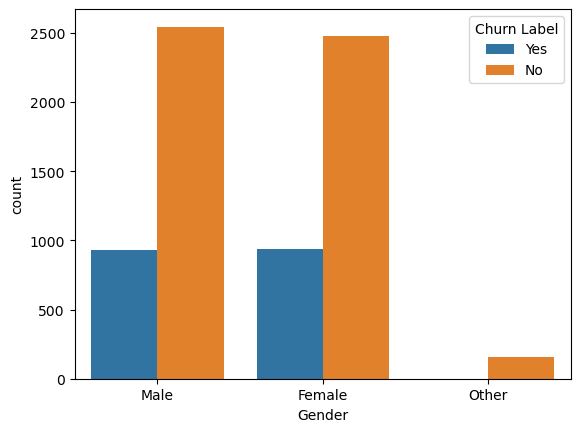

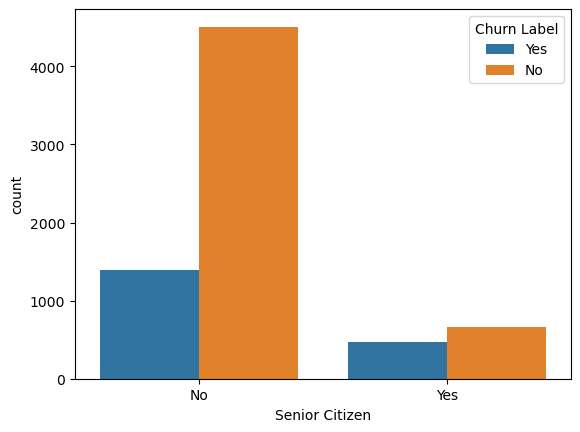

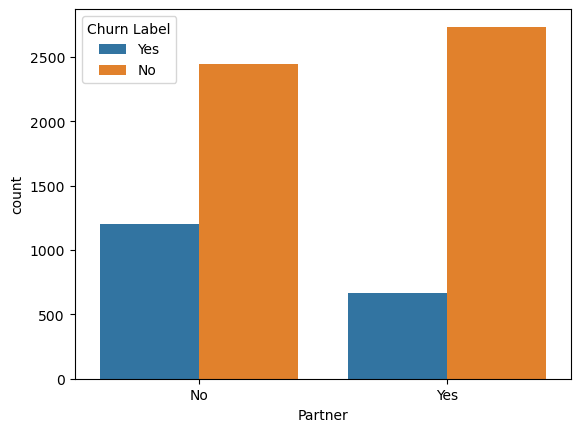

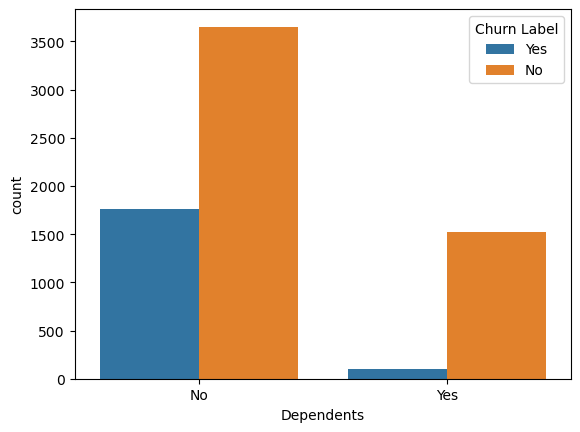

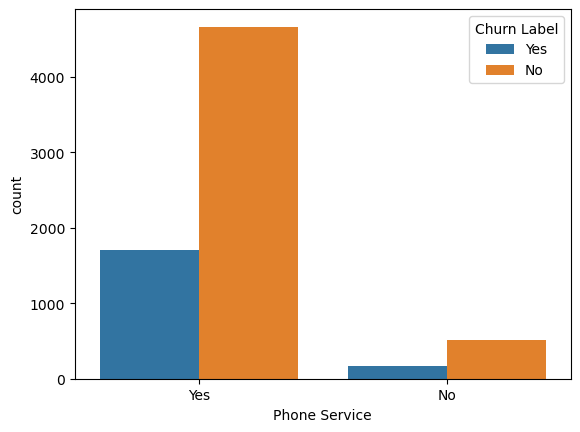

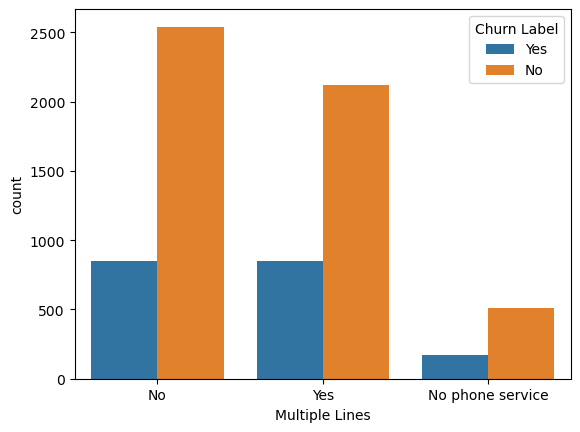

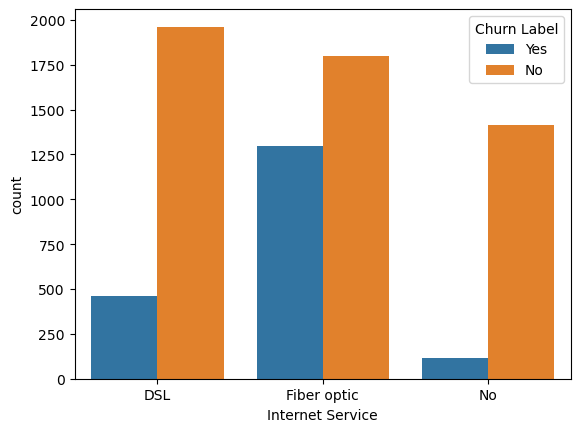

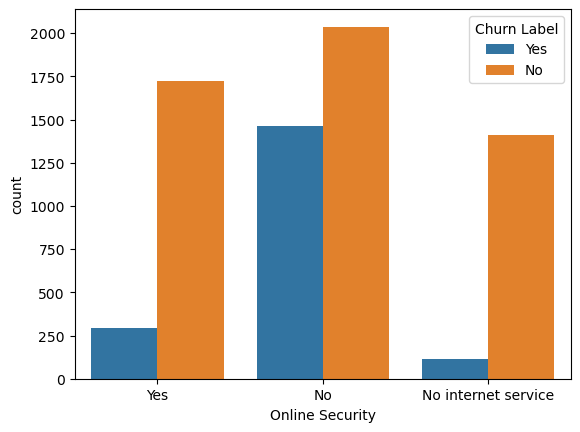

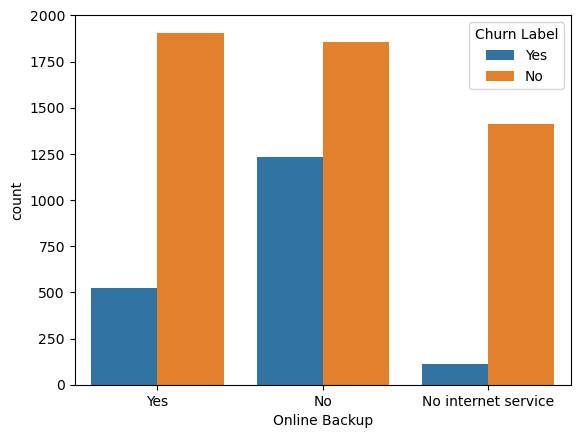

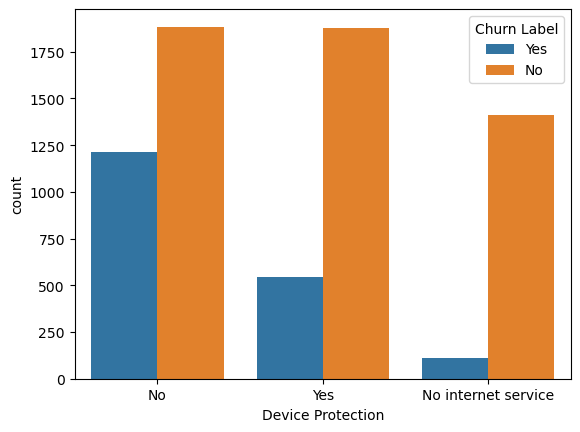

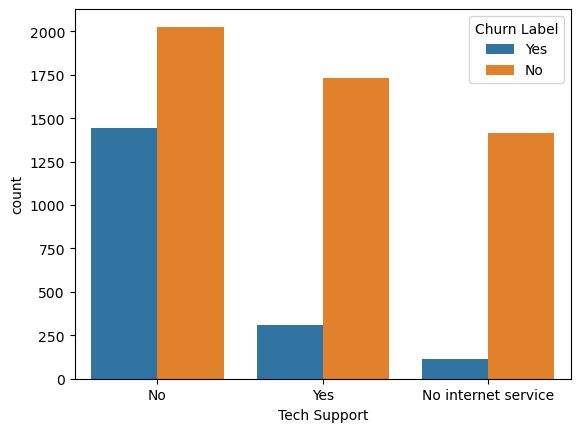

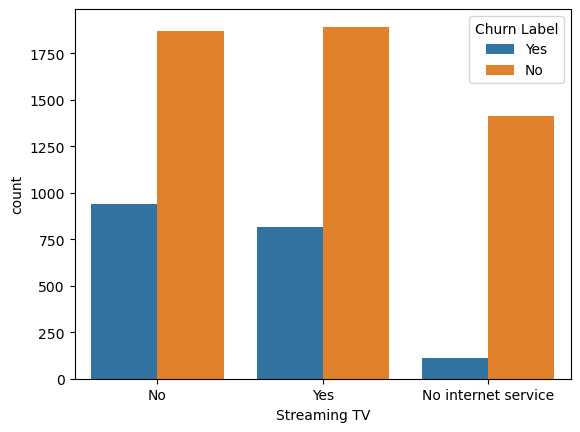

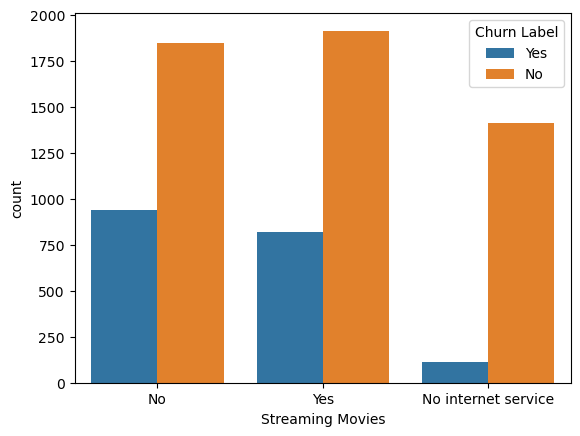

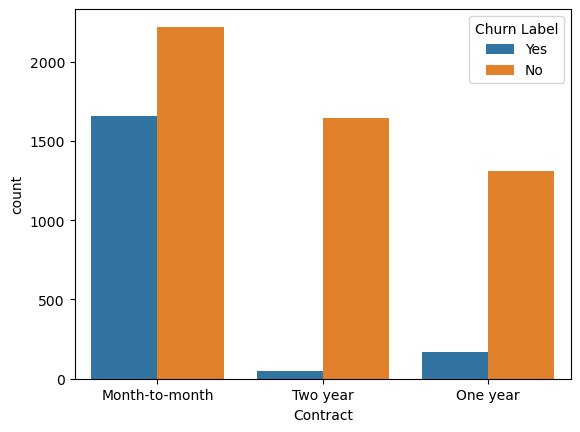

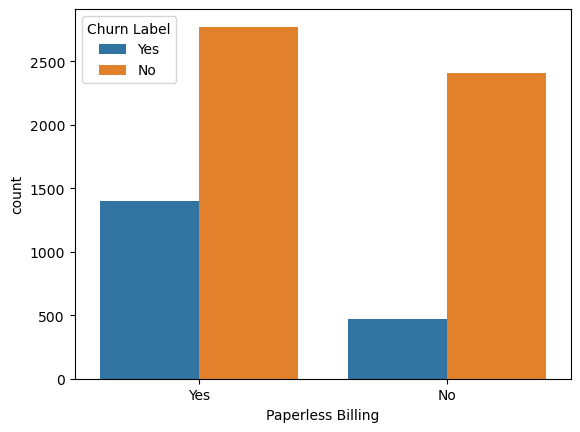

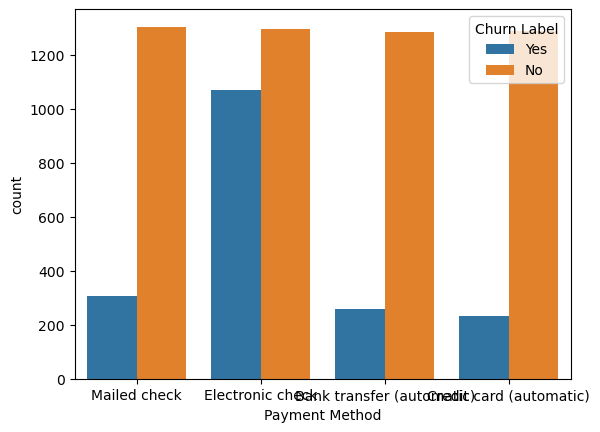

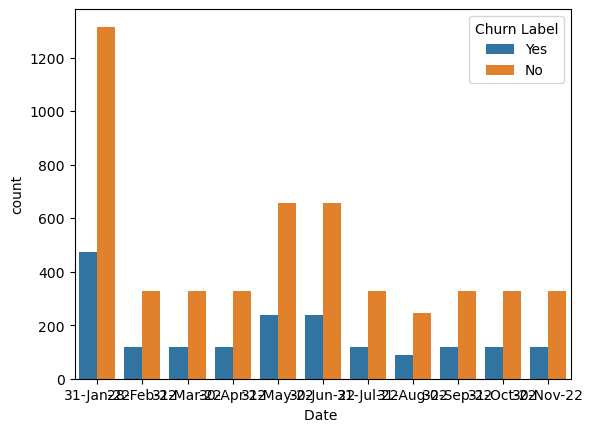

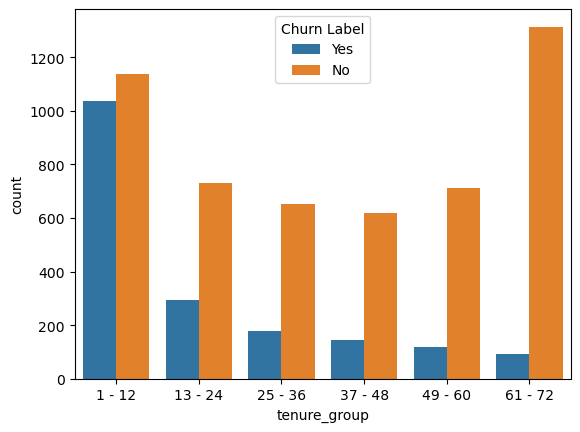

In [44]:
for i, predictor in enumerate(df.drop(columns=['Churn Label', 'Total Charges(Dollar)', 'Monthly Charges(Dollar)'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn Label')

These are some chart which shows different relation for the persons who have churned and who have stayed